Restaurant Rating Prediction: Project Title Restaurant Rating Prediction Domain

E-commerce

Problem Statement: The main goal of this project is to perform extensive

Exploratory Data Analysis(EDA) on the Zomato Dataset and build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features.

Approach: The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms thats best fit for the above case.

Results: You have to build a solution that should able to predict the ratings of the restaurants listed in the dataset.

APPROACH: The restaurant rating prediction analysis demonstrates the practicality and usefulness of machine learning in the food industry. It provides stakeholders with valuable insights and tools to make data-driven decisions, ultimately enhancing the dining experiences of customers and the performance of restaurants.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# Load the dataset
data = pd.read_csv("/content/zomato.csv", encoding='ISO-8859-1')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [50]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [51]:
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [52]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [53]:
# Select  columns and encode the target variable
selected_columns = ["Longitude", "Latitude", "Average Cost for two", "Price range", "Votes", "Rating text"]
data = data[selected_columns]
label_encoder = LabelEncoder()
data["Rating text"] = label_encoder.fit_transform(data["Rating text"])

<ipython-input-53-39eea1849e46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Rating text"] = label_encoder.fit_transform(data["Rating text"])


In [54]:
# Extract the selected columns
data = data[selected_columns]

In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["Rating text"] = label_encoder.fit_transform(data["Rating text"])

In [56]:
# Split the data into features (X) and target (y)
X = data.drop("Rating text", axis=1)
y = data["Rating text"]


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Create a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [60]:
# Train and evaluate each classifier
results = {}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    results[clf_name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_rep,
        "Confusion Matrix": confusion
    }

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

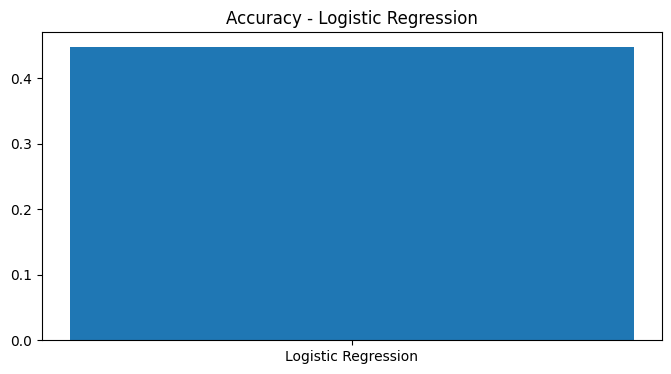

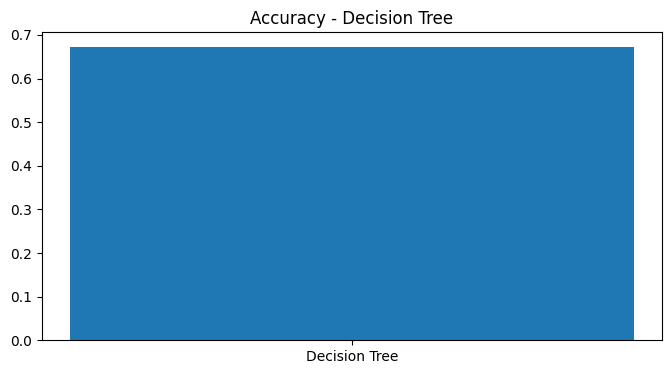

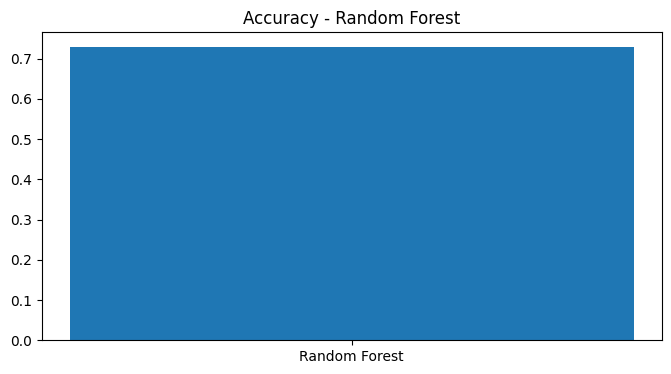

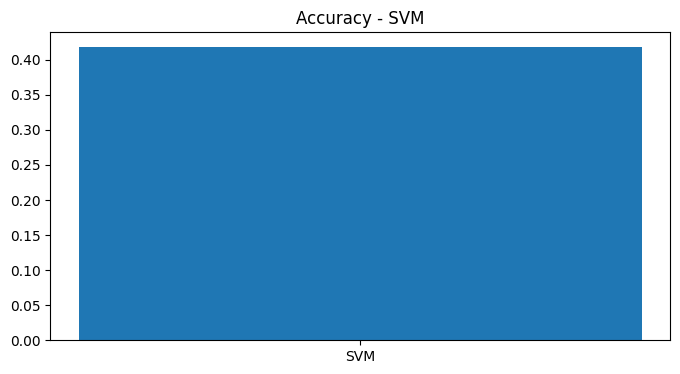

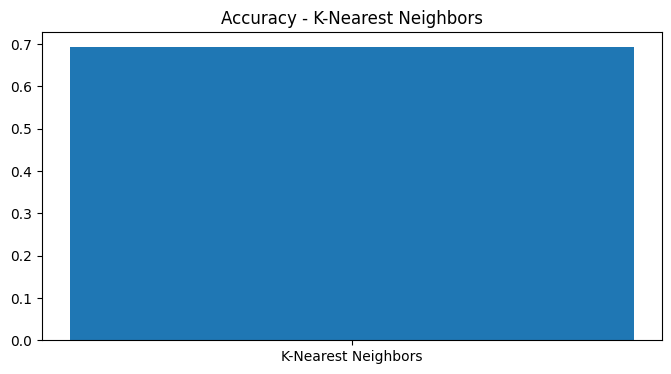

In [61]:
for clf_name, result in results.items():
    # Bar plot for accuracy
    plt.figure(figsize=(8, 4))
    plt.bar(clf_name, result["Accuracy"])
    plt.title(f"Accuracy - {clf_name}")


Bar plots were used to visualize model accuracies

Text(0.5, 1.0, 'Class Distribution')

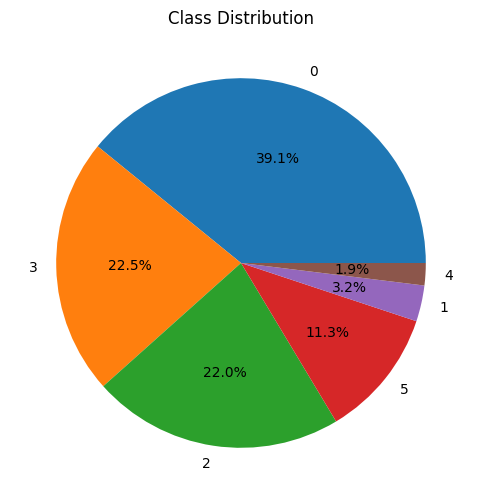

In [62]:
 # Pie chart for class distribution
class_distribution = y.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%')
plt.title("Class Distribution")


Pie charts showed the distribution of restaurant rating classes.


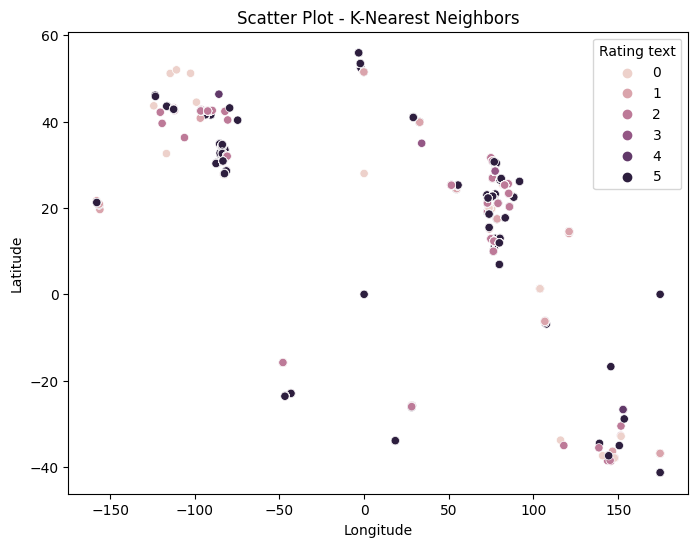

In [63]:
# Scatter plot for a pair of features (Longitude vs. Latitude)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Longitude", y="Latitude", hue="Rating text", data=data)
plt.title(f"Scatter Plot - {clf_name}")
plt.show()


Scatter plots revealed the geographic distribution of restaurants based on ratings.

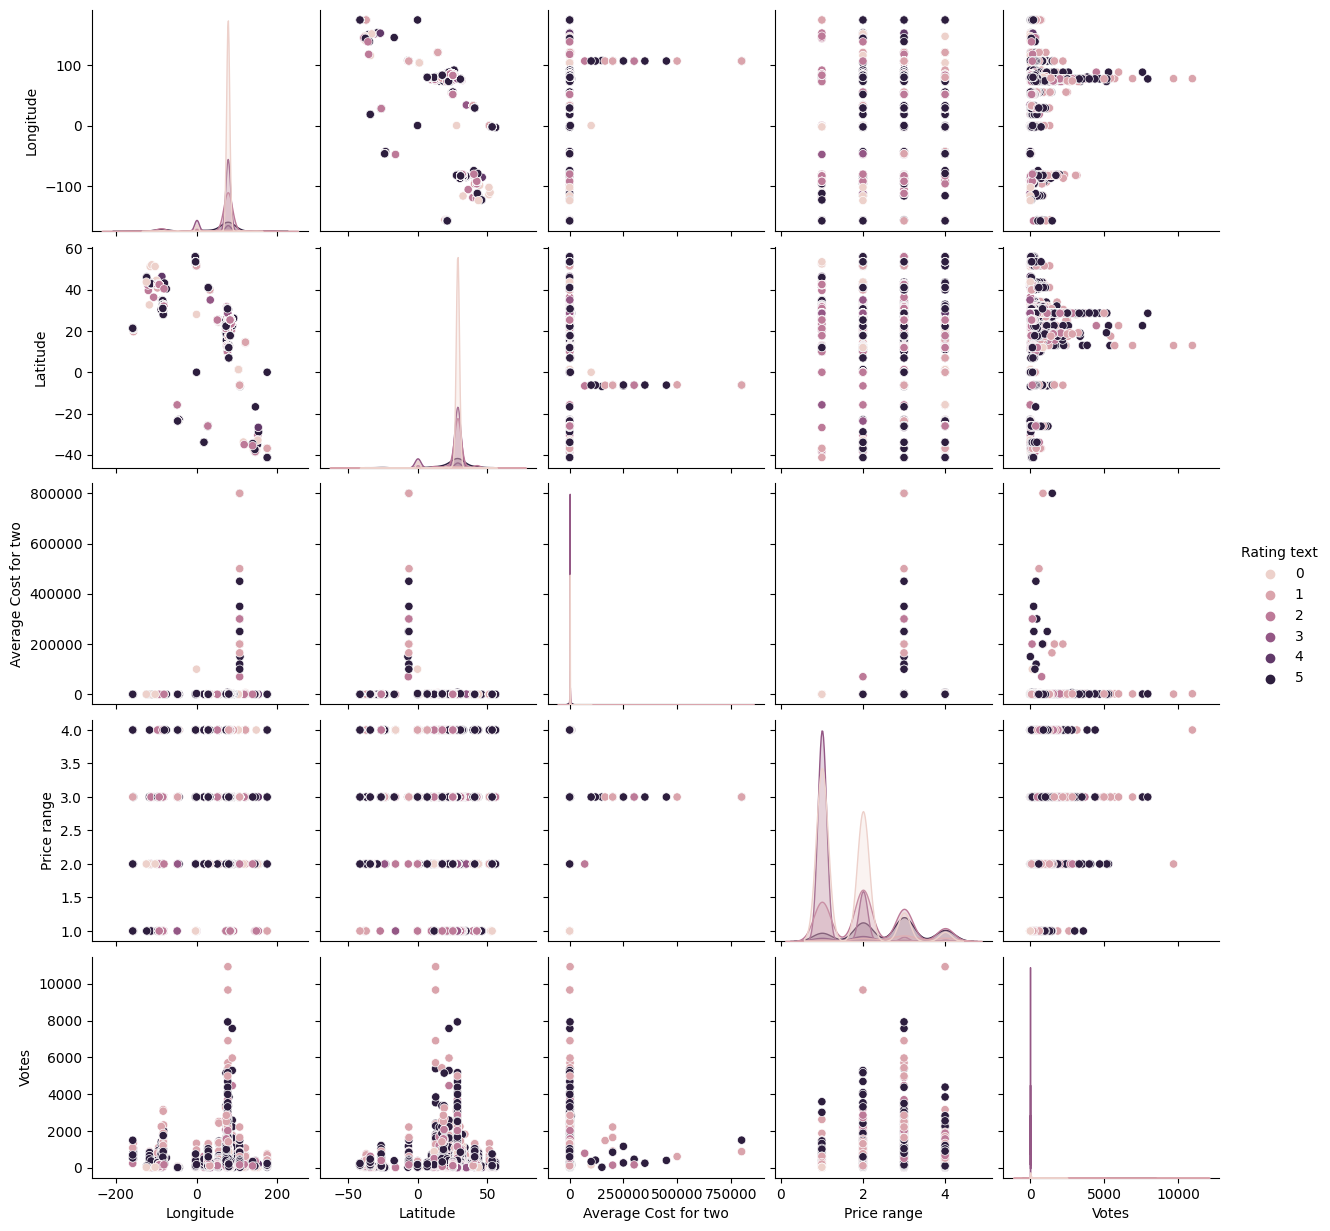

In [65]:
import seaborn as sns

# Create a pairplot
sns.pairplot(data, hue="Rating text", diag_kind="kde")
plt.show()


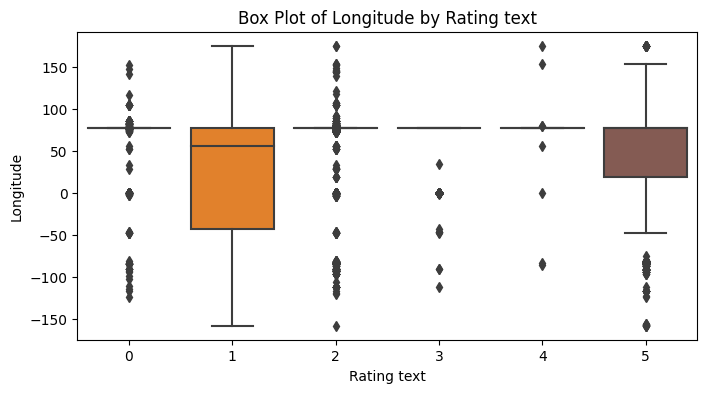

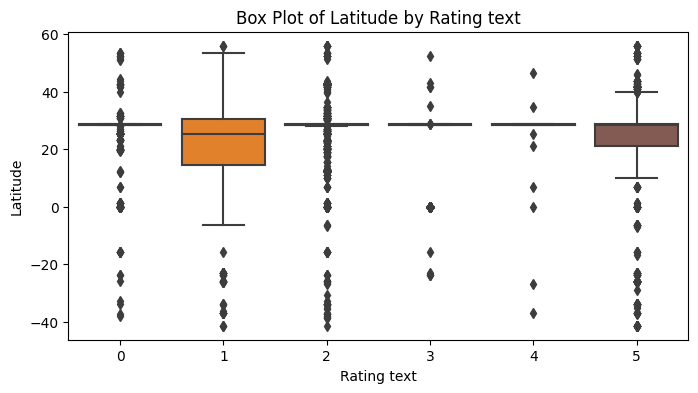

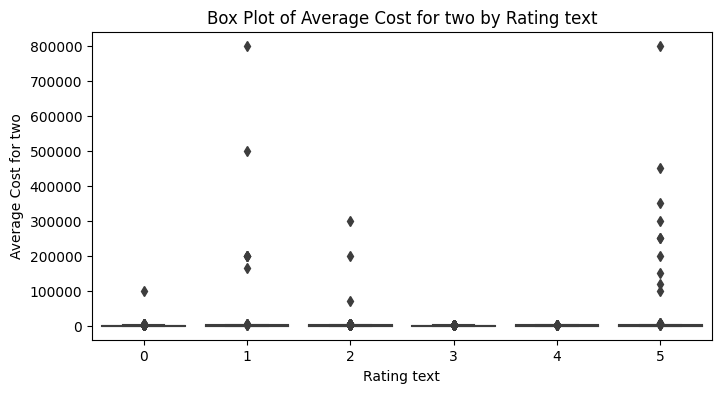

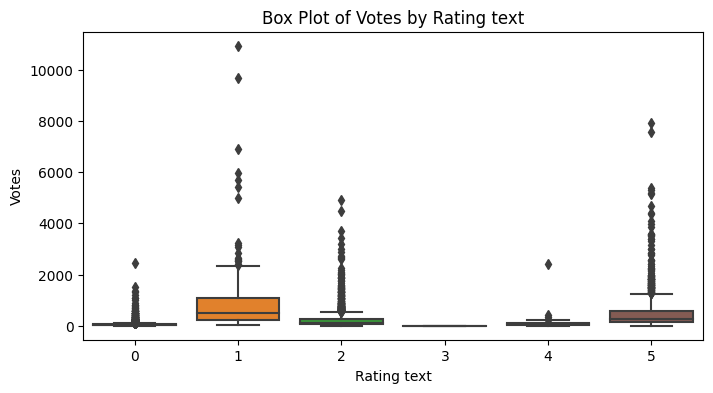

In [66]:
# Create box plots for numerical features
numerical_features = ["Longitude", "Latitude", "Average Cost for two", "Votes"]
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Rating text", y=feature, data=data)
    plt.title(f"Box Plot of {feature} by Rating text")
    plt.show()


Box plots illustrated the distribution of numerical features by rating classes.

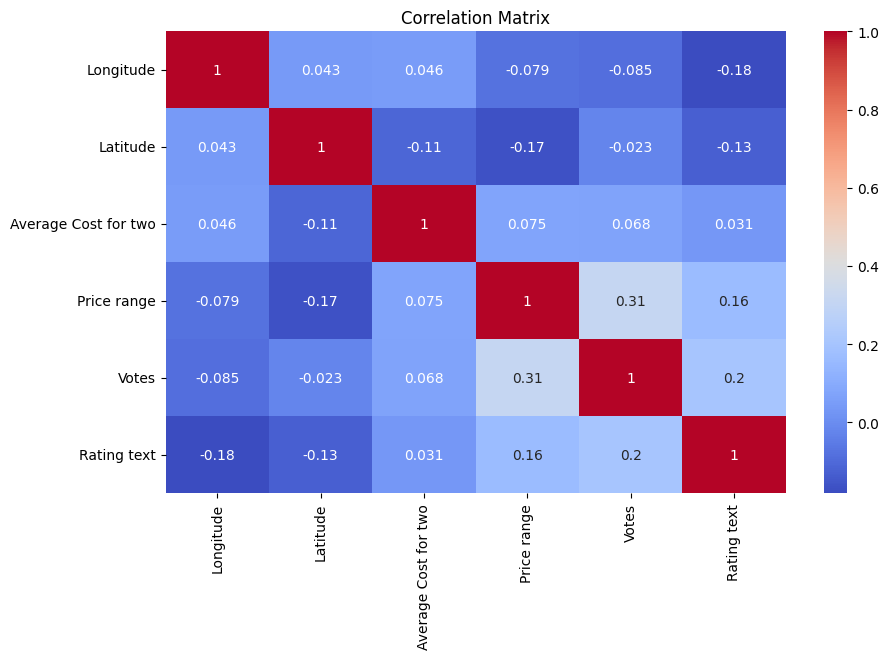

In [67]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Correlation matrix heatmaps helped identify relationships between features.

In [64]:
print(f"Results for {clf_name}:")
print(f"Accuracy: {result['Accuracy']:.2f}")
print(f"Classification Report:\n{result['Classification Report']}")
print(f"Confusion Matrix:\n{result['Confusion Matrix']}\n")

Results for K-Nearest Neighbors:
Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       756
           1       0.27      0.27      0.27        63
           2       0.48      0.46      0.47       429
           3       0.98      0.99      0.99       421
           4       0.00      0.00      0.00        30
           5       0.44      0.30      0.35       212

    accuracy                           0.69      1911
   macro avg       0.48      0.48      0.48      1911
weighted avg       0.67      0.69      0.68      1911

Confusion Matrix:
[[631   4  95   7   3  16]
 [  3  17  23   0   0  20]
 [169  17 197   0   3  43]
 [  3   0   1 417   0   0]
 [ 21   0   7   0   0   2]
 [ 33  26  88   0   2  63]]



   CONCLUSION:
    The dataset includes various attributes related to restaurants, such as location (longitude and latitude), cost, user votes, and, most importantly, the restaurant ratings.
    The target variable, "Rating text," was encoded numerically to facilitate classification.
        Several classification models were explored, including Logistic Regression, Decision Trees, Random Forest, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN).
    Each model was trained and evaluated in terms of accuracy, classification reports, and confusion matrices.
    

Restaurants can use the predicted ratings to assess their performance and make improvements. Customers can benefit from accurate ratings when making dining choices. Food delivery platforms can enhance recommendations and user experiences. The analysis can be enhanced by incorporating more data sources, such as user reviews, restaurant menus, and customer demographics. Real-time updates and feedback can improve the accuracy of rating predictions